In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

In [2]:
# df = pd.read_excel('cleansing_multi_category.xlsx')
df = pd.read_csv('range_4_option_a.csv')

In [3]:
df.head()

,title,genres,rating,action,film-noir,imax,crime,fantasy,children,comedy,...,animation,adventure,mystery,romance,documentary,thriller,war,sci-fi,drama,western
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,B,0,0,0,0,1,1,1,...,1,1,0,0,0,0,0,0,0,0
1,Jumanji (1995),Adventure|Children|Fantasy,B,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
2,Get Shorty (1995),Comedy|Crime|Thriller,B,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller,C,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,A,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,1,1,0


In [4]:
df.isnull().sum()

title          0
genres         0
rating         0
action         0
film-noir      0
imax           0
crime          0
fantasy        0
children       0
comedy         0
musical        0
horror         0
animation      0
adventure      0
mystery        0
romance        0
documentary    0
thriller       0
war            0
sci-fi         0
drama          0
western        0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.dtypes

title          object
genres         object
rating         object
action          int64
film-noir       int64
imax            int64
crime           int64
fantasy         int64
children        int64
comedy          int64
musical         int64
horror          int64
animation       int64
adventure       int64
mystery         int64
romance         int64
documentary     int64
thriller        int64
war             int64
sci-fi          int64
drama           int64
western         int64
dtype: object

In [7]:
df.rating.value_counts()

B    192
A    166
D    120
C     91
Name: rating, dtype: int64

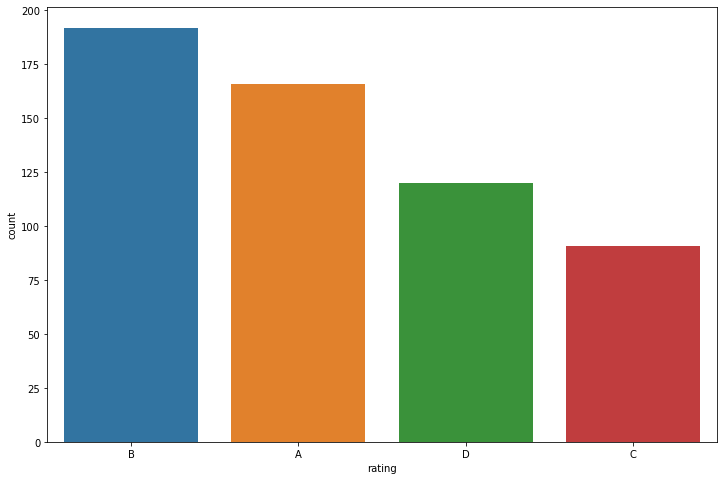

In [8]:
plt.figure(figsize=(12, 8))

sns.countplot(x=df.rating, order=df.rating.value_counts().index)

plt.show()

In [9]:
df.corr()

,action,film-noir,imax,crime,fantasy,children,comedy,musical,horror,animation,adventure,mystery,romance,documentary,thriller,war,sci-fi,drama,western
action,1.000000,-0.102653,0.077933,0.090246,-0.065443,-0.137026,-0.145619,-0.150761,-0.046211,-0.059856,0.203290,-0.068915,-0.122224,-0.074136,0.092524,0.102328,0.196211,-0.113395,0.043799
film-noir,-0.102653,1.000000,-0.044037,0.155806,-0.098658,-0.083018,-0.145073,-0.064417,-0.072718,-0.084260,-0.100810,0.170586,-0.021915,-0.026603,0.146457,-0.051227,-0.073926,0.004295,-0.043070
imax,0.077933,-0.044037,1.000000,-0.027980,0.083013,-0.006334,-0.107688,-0.002082,-0.044455,-0.008399,0.182054,-0.058217,-0.064914,0.043477,-0.016743,-0.051227,0.109860,-0.066034,-0.043070
crime,0.090246,0.155806,-0.027980,1.000000,-0.157127,-0.142177,-0.003331,-0.108826,-0.040606,-0.145346,-0.138242,0.178451,-0.101208,-0.058538,0.223512,-0.032548,-0.140426,0.094565,-0.071326
fantasy,-0.065443,-0.098658,0.083013,-0.157127,1.000000,0.267693,0.075063,0.083469,-0.089145,0.246842,0.214061,-0.081214,0.038818,-0.059601,-0.148885,-0.094954,-0.037200,-0.084073,-0.096492
children,-0.137026,-0.083018,-0.006334,-0.142177,0.267693,1.000000,0.132904,0.208214,-0.137087,0.465207,0.282363,-0.112863,-0.077108,-0.050152,-0.211867,-0.096572,-0.047685,-0.149884,-0.081195
comedy,-0.145619,-0.145073,-0.107688,-0.003331,0.075063,0.132904,1.000000,0.082428,-0.130259,0.070122,-0.016662,-0.122603,0.152603,-0.027414,-0.242163,-0.070908,-0.131662,-0.245241,-0.103734
musical,-0.150761,-0.064417,-0.002082,-0.108826,0.083469,0.208214,0.082428,1.000000,-0.106373,0.202860,-0.032260,-0.104135,0.150223,0.011295,-0.173699,-0.047742,-0.108826,-0.075075,0.000615
horror,-0.046211,-0.072718,-0.044455,-0.040606,-0.089145,-0.137087,-0.130259,-0.106373,1.000000,-0.106281,-0.173578,0.043571,-0.150261,-0.043930,0.214785,-0.059933,0.019096,-0.118085,-0.071121
animation,-0.059856,-0.084260,-0.008399,-0.145346,0.246842,0.465207,0.070122,0.202860,-0.106281,1.000000,0.191259,-0.115704,-0.069010,-0.050903,-0.191629,-0.075956,0.054965,-0.136996,-0.082411


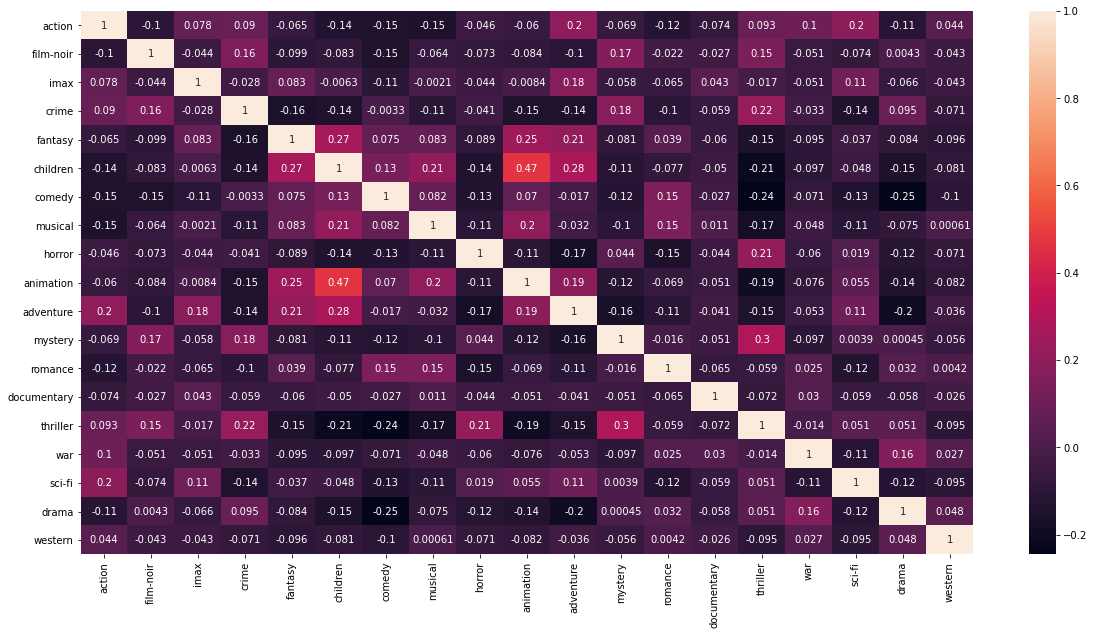

In [10]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True)

plt.show()

In [11]:
df.head(2)

,title,genres,rating,action,film-noir,imax,crime,fantasy,children,comedy,...,animation,adventure,mystery,romance,documentary,thriller,war,sci-fi,drama,western
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,B,0,0,0,0,1,1,1,...,1,1,0,0,0,0,0,0,0,0
1,Jumanji (1995),Adventure|Children|Fantasy,B,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0


In [12]:
X = df.drop(columns=['title', 'genres', 'rating'])


In [13]:
X.columns

Index(['action', 'film-noir', 'imax', 'crime', 'fantasy', 'children', 'comedy',
       'musical', 'horror', 'animation', 'adventure', 'mystery', 'romance',
       'documentary', 'thriller', 'war', 'sci-fi', 'drama', 'western'],
      dtype='object')

In [14]:
X.head()

,action,film-noir,imax,crime,fantasy,children,comedy,musical,horror,animation,adventure,mystery,romance,documentary,thriller,war,sci-fi,drama,western
0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0


In [15]:
X.shape

(569, 19)

In [16]:
y = df.iloc[:, 2]

In [17]:
y.dtype

dtype('O')

In [18]:
# pip install imbalanced-learn

In [19]:
y.value_counts()

B    192
A    166
D    120
C     91
Name: rating, dtype: int64

In [20]:
from imblearn.over_sampling import SMOTE

ros = SMOTE(sampling_strategy='minority')

X_oversampled, y_oversampled = ros.fit_resample(X, y)

In [21]:
y_oversampled.value_counts()

B    192
C    192
A    166
D    120
Name: rating, dtype: int64

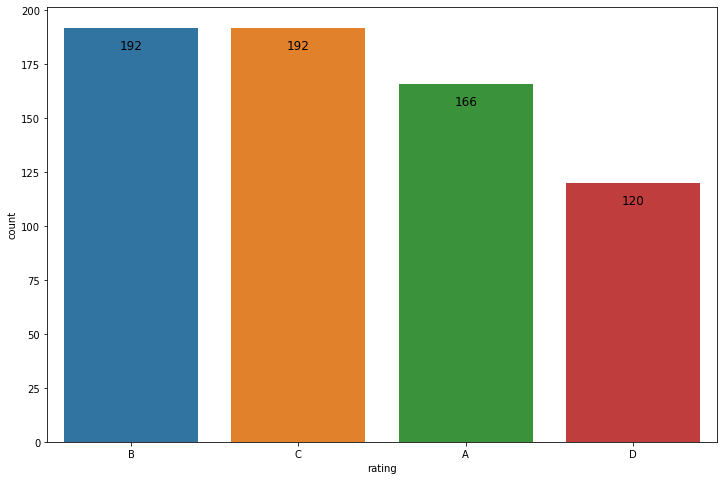

In [22]:
plt.figure(figsize=(12, 8))

sns.countplot(x=y_oversampled, order=y_oversampled.value_counts().index)

for x, data in enumerate(y_oversampled.value_counts()):
    plt.text(x, data-10, f'{data}', ha='center', fontsize=12)

plt.show()

In [23]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# y = le.fit_transform(y)

In [24]:
from sklearn.preprocessing import LabelBinarizer

le = LabelBinarizer()
y_oversampled = le.fit_transform(y_oversampled)

In [25]:
print(y_oversampled)

[[0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 ...
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]]


In [26]:
# import collections, numpy
# a = numpy.array(y)
# counter = collections.Counter(a)
# print(counter)

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.3, random_state=0)

In [52]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv1D, MaxPooling1D, Dropout, Flatten
from keras import optimizers
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [53]:
# model = Sequential()
    
# model.add(Conv1D(20, input_shape=(19,1), kernel_size=2, strides=2, padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPooling1D(pool_size=2))
    
# model.add(Conv1D(40, kernel_size=2, strides=2, padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPooling1D(pool_size=2))
    
# model.add(Flatten())
    
# model.add(Dense(128))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))
    
# model.add(Dense(64))
# model.add(Activation('relu'))
    
# model.add(Dense(32))
# model.add(Activation('relu'))
    
# model.add(Dense(4))
# model.add(Activation('softmax'))

In [54]:
#MODEL 1
# define our Convolutional Neural Network architecture
model = Sequential()
# model.add(Conv1D(16, 3, padding="same", activation="relu", input_shape=(136, 1)))
model.add(Conv1D(16, 3, activation="relu", input_shape=(19, 1)))
# model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(32, 3, padding="same", activation='relu'))
model.add(Conv1D(32, 3, activation='relu'))
# model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [55]:
# from keras.models import Sequential
# from keras.layers.core import Flatten
# from keras.layers.core import Dense
# from keras.layers.core import Dropout

# model = Sequential(
#     [
#         Flatten(input_shape=(19,)),
#         Dense(19, activation="relu", name="layer1"),
#         Dense(32, activation="relu", name="layer2"),
#         Dense(64, activation="relu", name="layer3"),
#         Dense(1024, activation="relu", name="layer4"),
#         Dropout(0.4),
#         Dense(64, activation="relu", name="layer5"),
#         Dropout(0.3),
#         Dense(32, activation="relu", name="layer6"),
#         Dropout(0.2),
#         Dense(4, activation = "softmax", name="layer7"),
#     ]
# )

In [56]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 17, 16)            64        
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 8, 16)            0         
 1D)                                                             
                                                                 
 conv1d_9 (Conv1D)           (None, 6, 32)             1568      
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 3, 32)            0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 96)                0         
                                                                 
 dropout_4 (Dropout)         (None, 96)               

In [57]:
from tensorflow.keras.optimizers import Adam

print("[INFO] training network...")
opt = Adam(learning_rate=1e-2, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
              metrics=["accuracy"])
H = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=64)

[INFO] training network...
Epoch 1/500
8/8 [==============================] - 1s 32ms/step - loss: 1.3338 - accuracy: 0.3390 - val_loss: 1.2778 - val_accuracy: 0.3881
Epoch 2/500
8/8 [==============================] - 0s 8ms/step - loss: 1.2502 - accuracy: 0.4435 - val_loss: 1.2134 - val_accuracy: 0.4279
Epoch 3/500
8/8 [==============================] - 0s 9ms/step - loss: 1.2424 - accuracy: 0.4414 - val_loss: 1.2131 - val_accuracy: 0.4279
Epoch 4/500
8/8 [==============================] - 0s 7ms/step - loss: 1.1777 - accuracy: 0.4627 - val_loss: 1.1991 - val_accuracy: 0.4527
Epoch 5/500
8/8 [==============================] - 0s 7ms/step - loss: 1.1611 - accuracy: 0.4819 - val_loss: 1.1968 - val_accuracy: 0.4677
Epoch 6/500
8/8 [==============================] - 0s 7ms/step - loss: 1.1397 - accuracy: 0.5096 - val_loss: 1.1961 - val_accuracy: 0.4179
Epoch 7/500
8/8 [==============================] - 0s 7ms/step - loss: 1.1354 - accuracy: 0.5032 - val_loss: 1.1453 - val_accuracy: 0.4428

8/8 [==============================] - 0s 6ms/step - loss: 0.7918 - accuracy: 0.6759 - val_loss: 1.1104 - val_accuracy: 0.5920
Epoch 60/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7653 - accuracy: 0.6674 - val_loss: 1.1415 - val_accuracy: 0.5672
Epoch 61/500
8/8 [==============================] - 0s 6ms/step - loss: 0.7502 - accuracy: 0.6972 - val_loss: 1.0640 - val_accuracy: 0.5920
Epoch 62/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7720 - accuracy: 0.7122 - val_loss: 1.0716 - val_accuracy: 0.6020
Epoch 63/500
8/8 [==============================] - 0s 6ms/step - loss: 0.7518 - accuracy: 0.7058 - val_loss: 1.0772 - val_accuracy: 0.5920
Epoch 64/500
8/8 [==============================] - 0s 6ms/step - loss: 0.7644 - accuracy: 0.6802 - val_loss: 1.0486 - val_accuracy: 0.6070
Epoch 65/500
8/8 [==============================] - 0s 6ms/step - loss: 0.7563 - accuracy: 0.6951 - val_loss: 1.1461 - val_accuracy: 0.5920
Epoch 66/500
8/8 [===============

8/8 [==============================] - 0s 7ms/step - loss: 0.6246 - accuracy: 0.7420 - val_loss: 1.1416 - val_accuracy: 0.6368
Epoch 118/500
8/8 [==============================] - 0s 8ms/step - loss: 0.6079 - accuracy: 0.7399 - val_loss: 1.1358 - val_accuracy: 0.5970
Epoch 119/500
8/8 [==============================] - 0s 7ms/step - loss: 0.6451 - accuracy: 0.7697 - val_loss: 1.1380 - val_accuracy: 0.5672
Epoch 120/500
8/8 [==============================] - 0s 7ms/step - loss: 0.6334 - accuracy: 0.7484 - val_loss: 1.1276 - val_accuracy: 0.6020
Epoch 121/500
8/8 [==============================] - 0s 9ms/step - loss: 0.6705 - accuracy: 0.7249 - val_loss: 1.0748 - val_accuracy: 0.6269
Epoch 122/500
8/8 [==============================] - 0s 8ms/step - loss: 0.5964 - accuracy: 0.7697 - val_loss: 1.1238 - val_accuracy: 0.6119
Epoch 123/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6031 - accuracy: 0.7548 - val_loss: 1.1573 - val_accuracy: 0.6070
Epoch 124/500
8/8 [=======

8/8 [==============================] - 0s 9ms/step - loss: 0.5596 - accuracy: 0.7719 - val_loss: 1.1332 - val_accuracy: 0.6468
Epoch 176/500
8/8 [==============================] - 0s 8ms/step - loss: 0.5719 - accuracy: 0.7804 - val_loss: 1.1349 - val_accuracy: 0.6219
Epoch 177/500
8/8 [==============================] - 0s 7ms/step - loss: 0.5585 - accuracy: 0.7761 - val_loss: 1.0841 - val_accuracy: 0.6169
Epoch 178/500
8/8 [==============================] - 0s 7ms/step - loss: 0.5735 - accuracy: 0.7655 - val_loss: 1.0893 - val_accuracy: 0.6318
Epoch 179/500
8/8 [==============================] - 0s 8ms/step - loss: 0.5749 - accuracy: 0.7825 - val_loss: 1.0977 - val_accuracy: 0.6517
Epoch 180/500
8/8 [==============================] - 0s 6ms/step - loss: 0.5346 - accuracy: 0.7974 - val_loss: 1.1111 - val_accuracy: 0.6318
Epoch 181/500
8/8 [==============================] - 0s 6ms/step - loss: 0.5410 - accuracy: 0.7825 - val_loss: 1.1142 - val_accuracy: 0.6617
Epoch 182/500
8/8 [========

8/8 [==============================] - 0s 10ms/step - loss: 0.5238 - accuracy: 0.8124 - val_loss: 1.1659 - val_accuracy: 0.6368
Epoch 234/500
8/8 [==============================] - 0s 11ms/step - loss: 0.5403 - accuracy: 0.8102 - val_loss: 1.1142 - val_accuracy: 0.6368
Epoch 235/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6083 - accuracy: 0.7463 - val_loss: 1.1237 - val_accuracy: 0.6418
Epoch 236/500
8/8 [==============================] - 0s 7ms/step - loss: 0.5687 - accuracy: 0.7910 - val_loss: 1.1572 - val_accuracy: 0.6468
Epoch 237/500
8/8 [==============================] - 0s 7ms/step - loss: 0.5497 - accuracy: 0.7974 - val_loss: 1.2082 - val_accuracy: 0.6468
Epoch 238/500
8/8 [==============================] - 0s 8ms/step - loss: 0.4829 - accuracy: 0.8081 - val_loss: 1.2469 - val_accuracy: 0.6517
Epoch 239/500
8/8 [==============================] - 0s 6ms/step - loss: 0.5106 - accuracy: 0.8060 - val_loss: 1.2823 - val_accuracy: 0.6269
Epoch 240/500
8/8 [=====

8/8 [==============================] - 0s 5ms/step - loss: 0.4669 - accuracy: 0.8316 - val_loss: 1.2035 - val_accuracy: 0.6468
Epoch 292/500
8/8 [==============================] - 0s 7ms/step - loss: 0.5373 - accuracy: 0.7932 - val_loss: 1.2449 - val_accuracy: 0.6418
Epoch 293/500
8/8 [==============================] - 0s 11ms/step - loss: 0.5328 - accuracy: 0.7996 - val_loss: 1.3267 - val_accuracy: 0.6219
Epoch 294/500
8/8 [==============================] - 0s 11ms/step - loss: 0.5039 - accuracy: 0.7996 - val_loss: 1.2846 - val_accuracy: 0.6468
Epoch 295/500
8/8 [==============================] - 0s 10ms/step - loss: 0.4779 - accuracy: 0.8081 - val_loss: 1.2230 - val_accuracy: 0.6219
Epoch 296/500
8/8 [==============================] - 0s 11ms/step - loss: 0.5386 - accuracy: 0.7932 - val_loss: 1.2380 - val_accuracy: 0.6219
Epoch 297/500
8/8 [==============================] - 0s 10ms/step - loss: 0.4948 - accuracy: 0.7953 - val_loss: 1.1988 - val_accuracy: 0.6318
Epoch 298/500
8/8 [===

8/8 [==============================] - 0s 10ms/step - loss: 0.4820 - accuracy: 0.8188 - val_loss: 1.2270 - val_accuracy: 0.6368
Epoch 350/500
8/8 [==============================] - 0s 10ms/step - loss: 0.4058 - accuracy: 0.8294 - val_loss: 1.2625 - val_accuracy: 0.6418
Epoch 351/500
8/8 [==============================] - 0s 10ms/step - loss: 0.4996 - accuracy: 0.8166 - val_loss: 1.2157 - val_accuracy: 0.6567
Epoch 352/500
8/8 [==============================] - 0s 6ms/step - loss: 0.4413 - accuracy: 0.8337 - val_loss: 1.1869 - val_accuracy: 0.6468
Epoch 353/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4681 - accuracy: 0.8188 - val_loss: 1.2250 - val_accuracy: 0.6169
Epoch 354/500
8/8 [==============================] - 0s 10ms/step - loss: 0.4730 - accuracy: 0.8252 - val_loss: 1.2183 - val_accuracy: 0.6368
Epoch 355/500
8/8 [==============================] - 0s 5ms/step - loss: 0.4705 - accuracy: 0.8230 - val_loss: 1.2472 - val_accuracy: 0.6418
Epoch 356/500
8/8 [====

8/8 [==============================] - 0s 7ms/step - loss: 0.4210 - accuracy: 0.8465 - val_loss: 1.2959 - val_accuracy: 0.6269
Epoch 408/500
8/8 [==============================] - 0s 10ms/step - loss: 0.4516 - accuracy: 0.8337 - val_loss: 1.3284 - val_accuracy: 0.6418
Epoch 409/500
8/8 [==============================] - 0s 9ms/step - loss: 0.5043 - accuracy: 0.8081 - val_loss: 1.3094 - val_accuracy: 0.6468
Epoch 410/500
8/8 [==============================] - 0s 6ms/step - loss: 0.4583 - accuracy: 0.8294 - val_loss: 1.2583 - val_accuracy: 0.6468
Epoch 411/500
8/8 [==============================] - 0s 10ms/step - loss: 0.4405 - accuracy: 0.8145 - val_loss: 1.2761 - val_accuracy: 0.6368
Epoch 412/500
8/8 [==============================] - 0s 8ms/step - loss: 0.4605 - accuracy: 0.8230 - val_loss: 1.3295 - val_accuracy: 0.6269
Epoch 413/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4763 - accuracy: 0.8166 - val_loss: 1.3899 - val_accuracy: 0.6617
Epoch 414/500
8/8 [======

8/8 [==============================] - 0s 10ms/step - loss: 0.4520 - accuracy: 0.8337 - val_loss: 1.2582 - val_accuracy: 0.6418
Epoch 466/500
8/8 [==============================] - 0s 11ms/step - loss: 0.4003 - accuracy: 0.8422 - val_loss: 1.2684 - val_accuracy: 0.6418
Epoch 467/500
8/8 [==============================] - 0s 10ms/step - loss: 0.4721 - accuracy: 0.8230 - val_loss: 1.3083 - val_accuracy: 0.6219
Epoch 468/500
8/8 [==============================] - 0s 10ms/step - loss: 0.4364 - accuracy: 0.8124 - val_loss: 1.3290 - val_accuracy: 0.6169
Epoch 469/500
8/8 [==============================] - 0s 9ms/step - loss: 0.4233 - accuracy: 0.8337 - val_loss: 1.3233 - val_accuracy: 0.6219
Epoch 470/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4239 - accuracy: 0.8273 - val_loss: 1.2869 - val_accuracy: 0.6368
Epoch 471/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4647 - accuracy: 0.8166 - val_loss: 1.3183 - val_accuracy: 0.6318
Epoch 472/500
8/8 [====

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


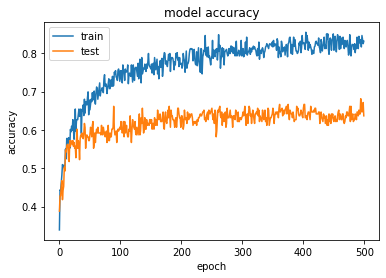

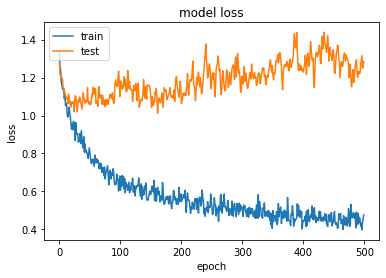

In [59]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()